## Titanic survival prediction using machine learning 

#### Importing the necessary libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Load the data set from sns

In [8]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
titanic.shape

(891, 15)

In [11]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Number of survivors

In [12]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

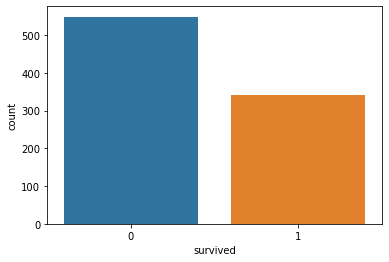

In [13]:
sns.countplot(x='survived', data=titanic)

<AxesSubplot:xlabel='pclass', ylabel='count'>

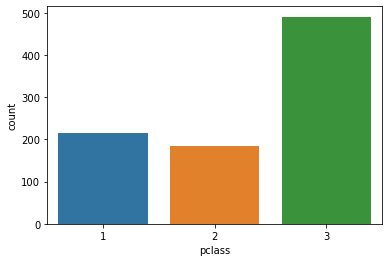

In [14]:
sns.countplot(x='pclass', data=titanic)

In [15]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


C:\Users\Karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Karthika\anac

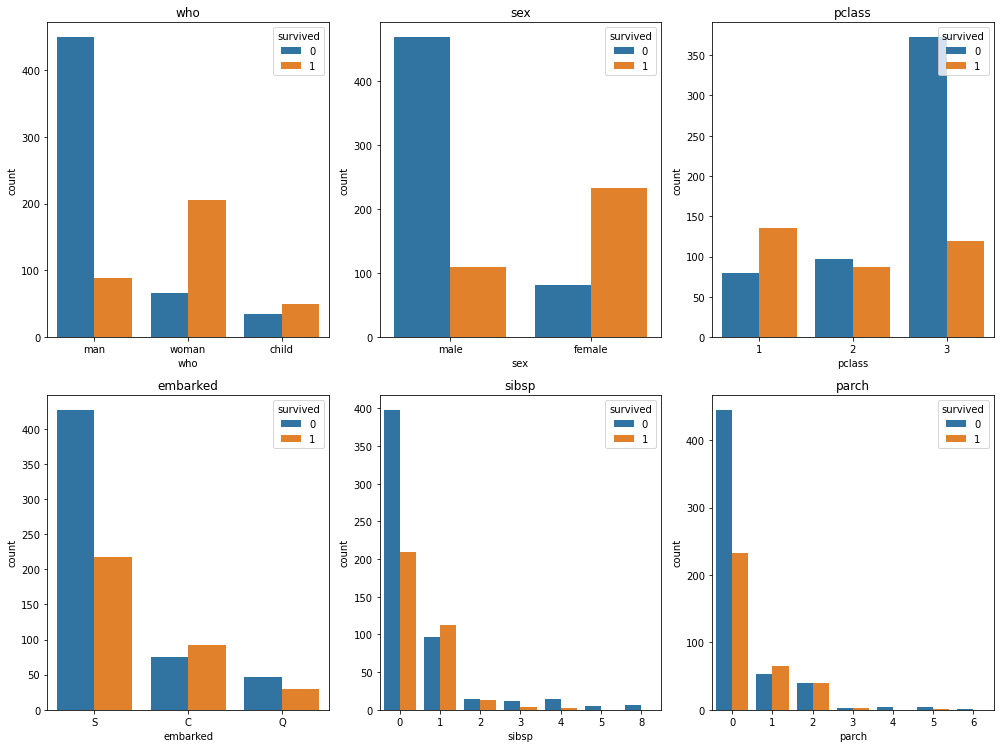

In [16]:
cols=['who','sex','pclass','embarked','sibsp','parch']
n_rows=2
n_cols=3
fig, axs=plt.subplots(n_rows, n_cols, figsize=(n_rows*7, n_cols*3.5))

for r in range(0,n_rows):
    for c in range(0, n_cols):
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(titanic[cols[i]], hue=titanic['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc = 'upper right')
plt.tight_layout()
        

### percentage of men and women who survived

In [17]:
titanic.groupby("sex")['survived'].mean()*100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

In [18]:
titanic.pivot_table('survived', index="sex", columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

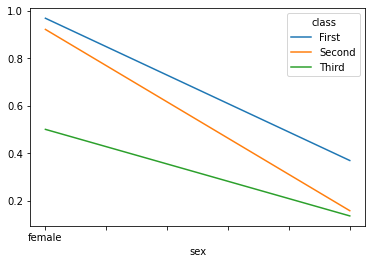

In [19]:
titanic.pivot_table('survived', index="sex", columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

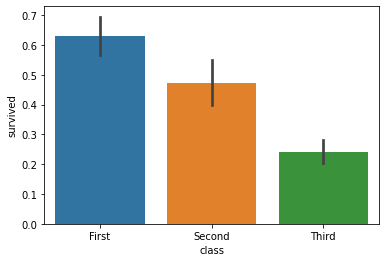

In [20]:
sns.barplot(x='class', y='survived', data=titanic)

#### Survival rate by sex, age and class

In [21]:
age=pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table("survived", ["sex", age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

### Plotting the survived with respect to age, sex and class

<AxesSubplot:xlabel='sex,age'>

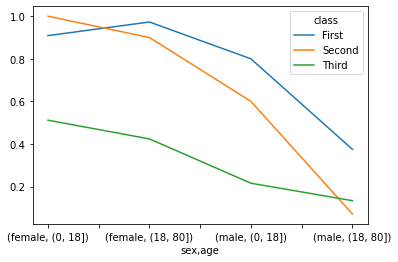

In [22]:
titanic.pivot_table("survived", ["sex", age], 'class').plot()

### Plot the price and class distribution

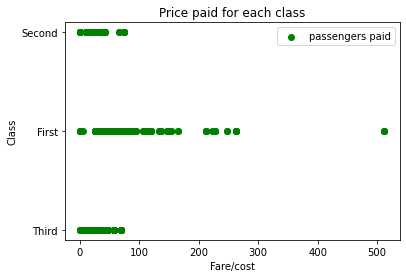

In [23]:
plt.scatter( titanic['fare'],titanic['class'],  color='green', label = 'passengers paid')
plt.xlabel("Fare/cost")
plt.ylabel("Class")
plt.title('Price paid for each class')
plt.legend()
plt.show()

#### Count the empty/missing values in each column

In [24]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Print all the values

In [25]:

for i in titanic:
    print(titanic[i].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

### Drop few columns that are not necessary

In [26]:
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'], axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [27]:
titanic=titanic.dropna(subset=['embarked','age'])

In [28]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


####  Find the data types

In [29]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

#### Printing the unique values 

In [30]:
print(titanic['sex'].unique())

['male' 'female']


In [31]:
print(titanic['embarked'].unique())

['S' 'C' 'Q']


#### Using label encoder to make object into numbers

#### Importing the sklearn 

In [32]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

#### Encoding the sex column 

In [33]:
titanic.iloc[:,2]=lab.fit_transform(titanic.iloc[:,2].values)
titanic.iloc[:,7]=lab.fit_transform(titanic.iloc[:,7].values)

C:\Users\Karthika\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [34]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [35]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

#### Split the data into independant and dependant variables

In [36]:
X=titanic.iloc[:, 1:8].values
Y=titanic.iloc[:, 0].values

#### Splitting the data set into training and test data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Scaling the data

In [39]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

#### Creating function for machine learning models - Logistic regression, KNN

In [42]:
def models(X_train, Y_train):
    #USe logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    KNN = KNeighborsClassifier(n_neighbors =5 , metric ='minkowski', p=2)
    KNN.fit(X_train, Y_train)
    
    #Use SVC (Linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Use Gaussian
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Use decision Tree
    from sklearn.tree import DecisionTreeClassifier 
    tree =  DecisionTreeClassifier(criterion = "entropy", random_state =0)
    tree.fit(X_train, Y_train)
    
    #Use Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #Print the training accuracy for each model
    print('[0]Linear Regression Training accuracy', log.score(X_train, Y_train))
    print('[1]K Neighbors Training accuracy', KNN.score(X_train, Y_train))
    print('[2]SVC Linear Training accuracy', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training accuracy', svc_rbf.score(X_train, Y_train))
    print('[4]GuassianNB Training accuracy', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training accuracy', tree.score(X_train, Y_train))
    print('[6]Random Forest Training accuracy', forest.score(X_train, Y_train))
    
    
    return log, KNN, svc_lin, svc_rbf, gauss, tree, forest 

#### Get and Train the models

In [44]:
model = models(X_train, Y_train)

[0]Linear Regression Training accuracy 0.7978910369068541
[1]K Neighbors Training accuracy 0.8664323374340949
[2]SVC Linear Training accuracy 0.7768014059753954
[3]SVC RBF Training accuracy 0.8506151142355008
[4]GuassianNB Training accuracy 0.8031634446397188
[5]Decision Tree Training accuracy 0.9929701230228472
[6]Random Forest Training accuracy 0.9753954305799648


#### Creating a confusion matrix and accuracy for the training data

In [50]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    ##Extract TN, TF, FP, FN
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score = (TN+TP)/(TN+TP+FN+FP)
                                      
                                      
    print(cm)
    print('Model {} testing accuracy = {}'.format(i, test_score))
    print()

[[75  7]
 [19 42]]
Model 0 testing accuracy = 0.8181818181818182

[[67 15]
 [20 41]]
Model 1 testing accuracy = 0.7552447552447552

[[70 12]
 [18 43]]
Model 2 testing accuracy = 0.7902097902097902

[[75  7]
 [22 39]]
Model 3 testing accuracy = 0.7972027972027972

[[69 13]
 [27 34]]
Model 4 testing accuracy = 0.7202797202797203

[[54 28]
 [12 49]]
Model 5 testing accuracy = 0.7202797202797203

[[73  9]
 [14 47]]
Model 6 testing accuracy = 0.8391608391608392



### Get the importance of the features 

In [76]:
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


#### Visualize the importance of the features

<AxesSubplot:xlabel='feature'>

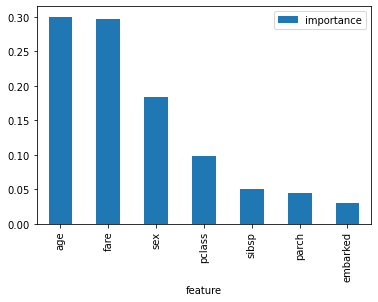

In [78]:
importances.plot.bar()

#### print the predictions of the model 

In [80]:
pred = model[6].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


#### Predict if a passanger will survive or not

In [106]:
pred_survival = [[2, 0, 35, 2, 2, 500, 2]] ##details of the passenger 
from sklearn.preprocessing import StandardScaler ##scaling the data
sc = StandardScaler()
pred_survival_scaled = sc.fit_transform(pred_survival)

##Print the prediction of the survival from the random forest classifier model 
pred = model[6].predict(pred_survival_scaled)
print (pred)

if pred == 0:
    print("Oh no! The passenger did not make it")
else:
    print("Nice! The passenger survived")

[0]
Oh no! The passenger did not make it


## END